In [46]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
from mapmanagercore import MapAnnotations, MultiImageLoader, MMapLoader
import matplotlib.pyplot as plt

In [48]:
# Create an image loader
loader = MultiImageLoader(
    lineSegments="../data/rr30a_s0u/line_segments.csv",
    points="../data/rr30a_s0u/points.csv")

# add image channels to the loader
loader.read("../data/rr30a_s0u/t0/rr30a_s0_ch1.tif", channel=0)
loader.read("../data/rr30a_s0u/t0/rr30a_s0_ch2.tif", channel=1)

loader.read("../data/rr30a_s0u/t0/rr30a_s0_ch1.tif", channel=0, time=1)
loader.read("../data/rr30a_s0u/t0/rr30a_s0_ch2.tif", channel=1, time=1)

# Create the annotation map
map = MapAnnotations(loader)

# save the annotation map
map.save("../data/rr30a_s0us.mmap")

/Users/cudmore/Sites/MapManagerCore/mapmanagercore/loader/base.py:223: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[key] = df[key].fillna(defaults[key])


In [49]:
# loading the map manager from zarr.
map = MapAnnotations(MMapLoader("../data/rr30a_s0us.mmap").cached())

In [50]:
map[:].columns

Index(['spineID', 't', 'segmentID', 'x', 'y', 'z', 'note', 'userType',
       'anchorX', 'anchorY', 'anchorZ', 'accept', 'spineLength',
       'xBackgroundOffset', 'yBackgroundOffset', 'roiExtend', 'points',
       'anchors', 'anchorPoint', 'segment', 'segmentLeft', 'segmentRight',
       'radius', 'roiBase', 'roiBaseBg', 'roiHead', 'roiHeadBg', 'roi',
       'roiBg', 'roiStats_ch1_sum', 'roiStats_ch1_max', 'roiStats_ch2_sum',
       'roiStats_ch2_max', 'roiStatsBg_ch1_sum', 'roiStatsBg_ch1_max',
       'roiStatsBg_ch2_sum', 'roiStatsBg_ch2_max'],
      dtype='object')

In [51]:
map.segments["segment"].get_coordinates(include_z=True)

,x,y,z
segmentID,,,
0,354.0,240.0,31.000
0,359.0,240.0,31.000
0,363.0,236.0,31.000
0,391.0,236.0,31.000
0,395.0,232.0,31.000
...,...,...,...
4,241.0,479.0,28.222
4,242.0,487.0,28.111
4,245.0,492.0,28.000


In [52]:
# spine df for tp 0
filtered = map[ map['t']==0 ]
filtered[:]

,,spineID,t,segmentID,x,y,z,note,userType,anchorX,anchorY,...,roi,roiBg,roiStats_ch1_sum,roiStats_ch1_max,roiStats_ch2_sum,roiStats_ch2_max,roiStatsBg_ch1_sum,roiStatsBg_ch1_max,roiStatsBg_ch2_sum,roiStatsBg_ch2_max
spineID,t,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,431.0,239.0,31,,-1,425.0,225.4,...,"POLYGON ((432.000 229.000, 432.000 228.000, 43...","POLYGON ((453.000 229.000, 453.000 228.000, 45...",47011.0,649.0,73400.0,1255.0,47011.0,649.0,73400.0,1255.0
1,0,1,0,0,382.0,250.0,31,,-1,378.0,236.0,...,"POLYGON ((386.000 232.000, 370.000 232.000, 37...","POLYGON ((407.000 246.000, 391.000 246.000, 39...",13277.0,420.0,8074.0,193.0,13277.0,420.0,8074.0,193.0
2,0,2,0,0,416.0,245.0,31,,-1,414.0,228.0,...,"POLYGON ((421.000 230.000, 421.000 222.000, 41...","POLYGON ((442.000 244.000, 442.000 236.000, 43...",39888.0,1096.0,39644.0,800.0,39888.0,1096.0,39644.0,800.0
3,0,3,0,0,447.0,231.0,31,,-1,444.0,218.1,...,"POLYGON ((441.000 223.000, 444.000 236.000, 45...","POLYGON ((462.000 244.000, 465.000 257.000, 47...",38013.0,895.0,60227.0,929.0,38013.0,895.0,60227.0,929.0
4,0,4,0,0,486.0,229.0,31,,-1,477.0,213.0,...,"POLYGON ((485.000 216.000, 484.000 209.000, 48...","POLYGON ((506.000 230.000, 505.000 223.000, 50...",16465.0,379.0,12268.0,268.0,16465.0,379.0,12268.0,268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0,134,0,4,171.0,362.0,29,,-1,184.9,357.1,...,"POLYGON ((178.000 355.000, 166.000 360.000, 16...","POLYGON ((192.000 334.000, 180.000 339.000, 18...",10221.0,329.0,6115.0,243.0,10221.0,329.0,6115.0,243.0
135,0,135,0,4,236.0,420.0,29,,-1,220.2,419.9,...,"POLYGON ((214.000 417.000, 214.000 418.000, 21...","POLYGON ((193.000 438.000, 193.000 439.000, 19...",48286.0,1142.0,107026.0,1490.0,48286.0,1142.0,107026.0,1490.0
136,0,136,0,4,253.0,486.0,28,,-1,242.0,487.0,...,"POLYGON ((238.000 488.000, 238.000 489.000, 23...","POLYGON ((224.000 509.000, 224.000 510.000, 22...",11137.0,303.0,6081.0,133.0,11137.0,303.0,6081.0,133.0


In [53]:
sessionID = 0
spineID = 25
map.deleteSpine((id, sessionID))

KeyError: 139

In [5]:
id = map.addSpine(segmentId=(0, 0), x=1,y=2,z=3)
# map.moveAnchor(spineId=id, x=1, y=1, z=3)
# map.moveSpine(spineId=id, x=1, y=1, z=3)
# map.deleteSpine((id, sessionID)
# map.undo()
# map.redo()
# map.updateSpine(spineId=id, value={
#   "f": 1,
# })
# map.undo()
# map.translateBackgroundRoi()
# map.deleteSegment("")


In [25]:
map.updateSpine(spineId=1, value={
  "note": "This is a note",
})
map[1, "note"]

t
0    This is a note
Name: note, dtype: object

In [31]:
map.segments["segment"].get_coordinates(include_z=True)

,x,y,z
segmentID,,,
0,354.0,240.0,31.000
0,359.0,240.0,31.000
0,363.0,236.0,31.000
0,391.0,236.0,31.000
0,395.0,232.0,31.000
...,...,...,...
4,241.0,479.0,28.222
4,242.0,487.0,28.111
4,245.0,492.0,28.000


In [32]:
map.segments["segmentLeft"].get_coordinates()
map.segments["segmentRight"].get_coordinates()

,x,y
segmentID,,
0,354.000000,236.000000
0,357.343146,236.000000
0,360.171573,233.171573
0,360.777719,232.674122
0,361.469266,232.304482
...,...,...
4,248.743193,490.589856
4,248.935275,491.283331
4,249.000000,492.000000


In [34]:
filtered = map[ map['t']==1 ]
filtered["roi"].get_coordinates()

x      y
spineID t              
0       1  431.0  229.0
        1  432.0  229.0
        1  432.0  228.0
        1  435.0  226.0
        1  430.0  220.0
        1  429.0  221.0
        1  417.0  222.0
        1  417.0  225.0
        1  395.0  237.0
        1  398.0  244.0
        1  426.0  229.0
        1  430.0  229.0
        1  431.0  229.0

In [10]:
map["roiBase"].get_coordinates()

x           y
spineID t                        
0       0  430.284988  228.989835
        0  430.663610  228.944569
        0  431.036201  228.863455
        0  431.399375  228.747232
        0  431.749832  228.596955
...               ...         ...
139     0  359.000000  234.343146
        0  357.343146  236.000000
        0  354.000000  236.000000
        0  354.000000  244.000000
        0  359.000000  244.000000

[2381 rows x 2 columns]

In [11]:
slices = map.getPixels(time=0, channel=0, zRange=(18, 36))

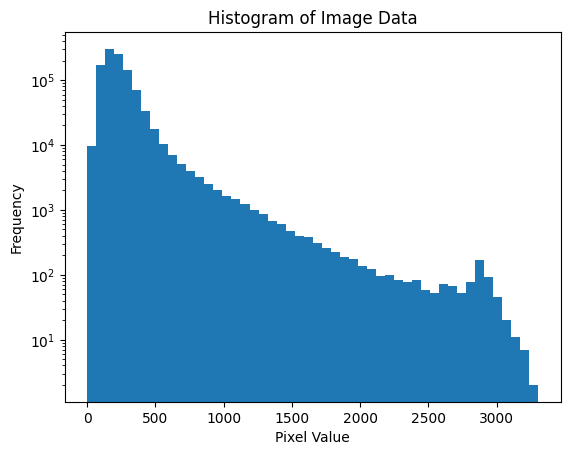

In [12]:
plt.hist(slices.data(), bins=50)
plt.yscale('log')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Image Data')
plt.show()

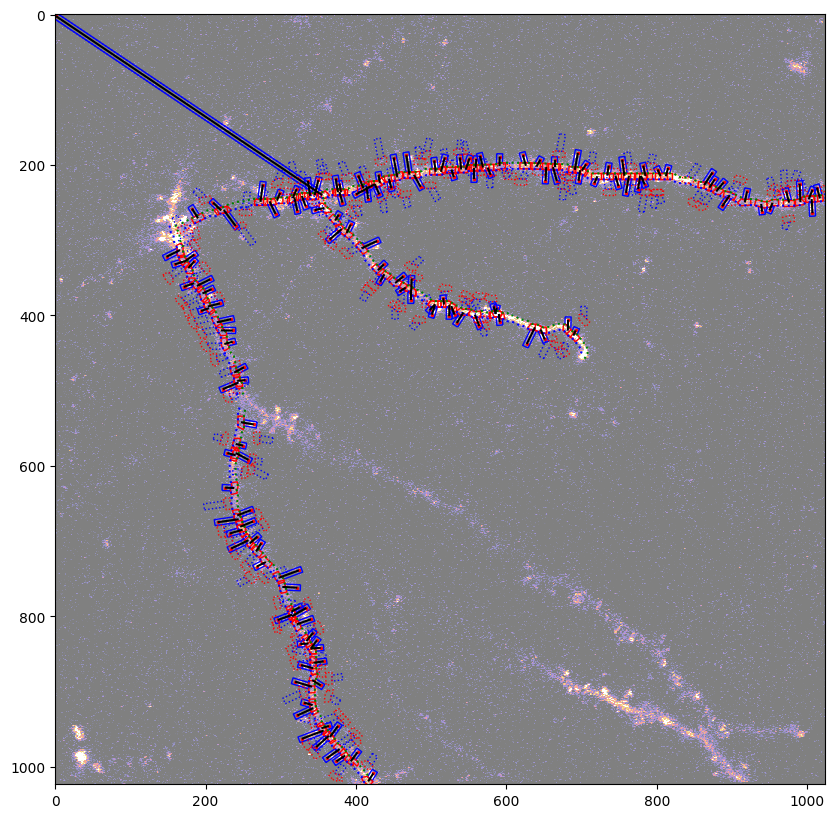

In [14]:

fig, ax = plt.subplots(figsize=(10, 10))

map.segments["segmentLeft"].plot(color='blue', linestyle='dotted', ax=ax)
map.segments["segmentRight"].plot(color='green', linestyle='dotted', ax=ax)

map["anchors"].plot(color='black', ax=ax)
map["points"].plot(color='red', marker='o', markersize=2, ax=ax)

map["roiHead"].plot(edgecolor='blue', color=(0,0,0,0), ax=ax)
map["roiHeadBg"].plot(edgecolor='blue', linestyle='dotted', color=(0,0,0,0), ax=ax)

map["roiBase"].plot(edgecolor='red', color=(0,0,0,0), ax=ax)
map["roiBaseBg"].plot(edgecolor='red', linestyle='dotted', color=(0,0,0,0), ax=ax)

slices.plot(ax=ax, vmin=300, vmax=1500, alpha=0.5, cmap='CMRmap')

plt.show()

In [15]:
map["z"].between(10, 40)

spineID  t
0        0     True
         1     True
1        0     True
2        0     True
3        0     True
              ...  
135      0     True
136      0     True
137      0     True
138      0     True
139      0    False
Name: z, Length: 141, dtype: boolean

In [16]:
filtered = map[map["z"].between(10, 40)]

In [8]:
map[:]

spineID  t  segmentID      x      y   z            note  userType  \
spineID t                                                                      
0       0        0  0          0  431.0  239.0  31                        -1   
        1        0  1          0  400.0  239.0  31                        -1   
1       0        1  0          0  382.0  250.0  31  This is a note        -1   
2       0        2  0          0  416.0  245.0  31                        -1   
3       0        3  0          0  447.0  231.0  31                        -1   
...            ... ..        ...    ...    ...  ..             ...       ...   
135     0      135  0          4  236.0  420.0  29                        -1   
136     0      136  0          4  253.0  486.0  28                        -1   
137     0      137  0          4  234.0  405.0  29                        -1   
138     0      138  0          4  159.0  332.0  31                        -1   
139     0      139  0          0    1.0    2.0   3                        -1   

           anchorX  anchorY  ...  \
spineID t                    ...   
0       0    425.0    225.4  ...   
        1    425.0    225.4  ...   
1       0    378.0    236.0  ...   
2       0    414.0    228.0  ...   
3       0    444.0    218.1  ...   
...            ...      ...  ...   
135     0    220.2    419.9  ...   
136     0    242.0    487.0  ...   
137     0    214.9    409.1  ...   
138     0    172.0    328.0  ...   
139     0    355.0    240.0  ...   

                                                         roi  \
spineID t                                                      
0       0  POLYGON ((432.000 229.000, 432.000 228.000, 43...   
        1  POLYGON ((431.000 229.000, 432.000 229.000, 43...   
1       0  POLYGON ((386.000 232.000, 370.000 232.000, 37...   
2       0  POLYGON ((421.000 230.000, 421.000 222.000, 41...   
3       0  POLYGON ((441.000 223.000, 444.000 236.000, 45...   
...                                                      ...   
135     0  POLYGON ((214.000 417.000, 214.000 418.000, 21...   
136     0  POLYGON ((238.000 488.000, 238.000 489.000, 23...   
137     0  POLYGON ((209.000 408.000, 210.000 408.000, 21...   
138     0  POLYGON ((172.000 337.000, 178.000 331.000, 17...   
139     0  POLYGON ((360.000 244.000, 361.000 244.000, 36...   

                                                       roiBg  \
spineID t                                                      
0       0  POLYGON ((453.000 229.000, 453.000 228.000, 45...   
        1  POLYGON ((452.000 229.000, 453.000 229.000, 45...   
1       0  POLYGON ((407.000 246.000, 391.000 246.000, 39...   
2       0  POLYGON ((442.000 244.000, 442.000 236.000, 43...   
3       0  POLYGON ((462.000 244.000, 465.000 257.000, 47...   
...                                                      ...   
135     0  POLYGON ((193.000 438.000, 193.000 439.000, 19...   
136     0  POLYGON ((224.000 509.000, 224.000 510.000, 22...   
137     0  POLYGON ((188.000 422.000, 189.000 422.000, 19...   
138     0  POLYGON ((186.000 316.000, 192.000 310.000, 19...   
139     0  POLYGON ((360.000 244.000, 361.000 244.000, 36...   

           roiStats_ch1_sum  roiStats_ch1_max  roiStats_ch2_sum  \
spineID t                                                         
0       0           47011.0             649.0           73400.0   
        1           59195.0            1096.0           84382.0   
1       0           13277.0             420.0            8074.0   
2       0           39888.0            1096.0           39644.0   
3       0           38013.0             895.0           60227.0   
...                     ...               ...               ...   
135     0           48286.0            1142.0          107026.0   
136     0           11137.0             303.0            6081.0   
137     0           37523.0             626.0           67613.0   
138     0           13139.0             381.0            5377.0   
139     0          405320.0    

In [18]:
filtered[:]

spineID  t  segmentID      x      y   z            note  userType  \
spineID t                                                                      
0       0        0  0          0  431.0  239.0  31                        -1   
        1        0  1          0  400.0  239.0  31                        -1   
1       0        1  0          0  382.0  250.0  31  This is a note        -1   
2       0        2  0          0  416.0  245.0  31                        -1   
3       0        3  0          0  447.0  231.0  31                        -1   
...            ... ..        ...    ...    ...  ..             ...       ...   
134     0      134  0          4  171.0  362.0  29                        -1   
135     0      135  0          4  236.0  420.0  29                        -1   
136     0      136  0          4  253.0  486.0  28                        -1   
137     0      137  0          4  234.0  405.0  29                        -1   
138     0      138  0          4  159.0  332.0  31                        -1   

           anchorX  anchorY  ...  \
spineID t                    ...   
0       0    425.0    225.4  ...   
        1    425.0    225.4  ...   
1       0    378.0    236.0  ...   
2       0    414.0    228.0  ...   
3       0    444.0    218.1  ...   
...            ...      ...  ...   
134     0    184.9    357.1  ...   
135     0    220.2    419.9  ...   
136     0    242.0    487.0  ...   
137     0    214.9    409.1  ...   
138     0    172.0    328.0  ...   

                                                         roi  \
spineID t                                                      
0       0  POLYGON ((432.000 229.000, 432.000 228.000, 43...   
        1  POLYGON ((431.000 229.000, 432.000 229.000, 43...   
1       0  POLYGON ((386.000 232.000, 370.000 232.000, 37...   
2       0  POLYGON ((421.000 230.000, 421.000 222.000, 41...   
3       0  POLYGON ((441.000 223.000, 444.000 236.000, 45...   
...                                                      ...   
134     0  POLYGON ((178.000 355.000, 166.000 360.000, 16...   
135     0  POLYGON ((214.000 417.000, 214.000 418.000, 21...   
136     0  POLYGON ((238.000 488.000, 238.000 489.000, 23...   
137     0  POLYGON ((209.000 408.000, 210.000 408.000, 21...   
138     0  POLYGON ((172.000 337.000, 178.000 331.000, 17...   

                                                       roiBg  \
spineID t                                                      
0       0  POLYGON ((453.000 229.000, 453.000 228.000, 45...   
        1  POLYGON ((452.000 229.000, 453.000 229.000, 45...   
1       0  POLYGON ((407.000 246.000, 391.000 246.000, 39...   
2       0  POLYGON ((442.000 244.000, 442.000 236.000, 43...   
3       0  POLYGON ((462.000 244.000, 465.000 257.000, 47...   
...                                                      ...   
134     0  POLYGON ((192.000 334.000, 180.000 339.000, 18...   
135     0  POLYGON ((193.000 438.000, 193.000 439.000, 19...   
136     0  POLYGON ((224.000 509.000, 224.000 510.000, 22...   
137     0  POLYGON ((188.000 422.000, 189.000 422.000, 19...   
138     0  POLYGON ((186.000 316.000, 192.000 310.000, 19...   

           roiStats_ch1_sum  roiStats_ch1_max  roiStats_ch2_sum  \
spineID t                                                         
0       0           47011.0             649.0           73400.0   
        1           59195.0            1096.0           84382.0   
1       0           13277.0             420.0            8074.0   
2       0           39888.0            1096.0           39644.0   
3       0           38013.0             895.0           60227.0   
...                     ...               ...               ...   
134     0           10221.0             329.0            6115.0   
135     0           48286.0            1142.0          107026.0   
136     0           11137.0             303.0            6081.0   
137     0           37523.0             626.0           67613.0   
138     0           13139.0    

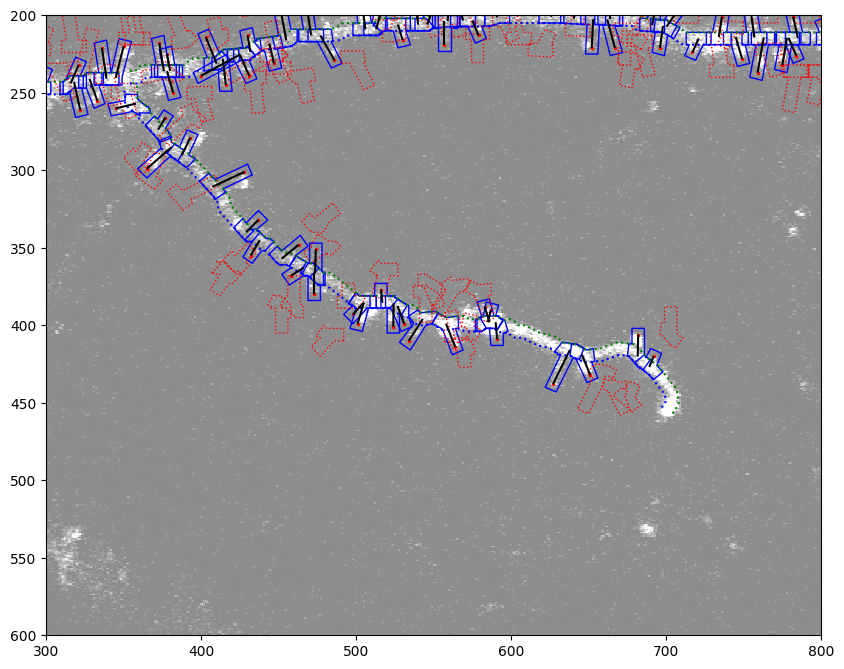

In [19]:
slices = filtered.getPixels(time=0, channel=0)

fig, ax = plt.subplots(figsize=(10, 10))

filtered.segments["segmentLeft"].plot(color='blue', linestyle='dotted', ax=ax)
filtered.segments["segmentRight"].plot(color='green', linestyle='dotted', ax=ax)

filtered["anchors"].plot(color='black', ax=ax)
filtered["points"].plot(color='red', marker='o', markersize=2, ax=ax)

filtered["roi"].plot(edgecolor='blue', color=(0,0,0,0), ax=ax)
filtered["roiBg"].plot(edgecolor='red', linestyle='dotted', color=(0,0,0,0), ax=ax)

slices.plot(ax=ax, vmin=300, vmax=1500, alpha=0.45, cmap='gray')

# Set x and y limits
ax.set_xlim(300, 800)
ax.set_ylim(600, 200)

plt.show()

In [20]:
layers = filtered.getAnnotations(options={
    "selection": {
      "t": 0,
      "z": (18, 36)
    },
    "annotationSelections": {
      "segmentIDEditing": None,
      "segmentID": None,
      "spineID": None
    },
    "showLineSegments": True,
    "showAnchors": True,
    "showLabels": True,
    "showLineSegmentsRadius": True,
    "showSpines": True,
  },
)

for layer in layers:
    coords, props = layer.coordinates()
    print("Properties:", props, "\n coords:", coords.head(2), "\n\n")

Properties: {'id': 'segment-left', 'select': 'segmentID', 'edit': 'segmentIDEditing', 'stroke': <function AnnotationsLayers._getSegments.<locals>.<lambda> at 0x14c5e4220>, 'strokeWidth': 0.5, 'offset': <function AnnotationsLayers._getSegments.<locals>.<lambda> at 0x14c5e42c0>} 
 coords:                       x      y
segmentID t                   
0         0  354.000000  232.0
          0  355.686292  232.0 


Properties: {'id': 'segment-right', 'select': 'segmentID', 'edit': 'segmentIDEditing', 'stroke': <function AnnotationsLayers._getSegments.<locals>.<lambda> at 0x14c5e4220>, 'strokeWidth': 0.5, 'offset': <function AnnotationsLayers._getSegments.<locals>.offset at 0x14c5e4360>} 
 coords:                  x      y
segmentID t              
0         0  354.0  248.0
          0  359.0  248.0 


Properties: {'id': 'segment-interaction', 'select': 'segmentID', 'edit': 'segmentIDEditing', 'stroke': [0, 0, 0, 0], 'strokeWidth': <function AnnotationsLayers._getSegments.<locals>.<lambda> 